### 모델링

0 : S Class Challenge, 1 : Knock Challenge

In [2]:
import pandas as pd

df = pd.read_csv("./data/test.csv")
df

,LEFT_SHOULDER-LEFT_SHOULDER angle,LEFT_SHOULDER-RIGHT_SHOULDER angle,RIGHT_SHOULDER-LEFT_ELBOW angle,LEFT_ELBOW-RIGHT_ELBOW angle,RIGHT_ELBOW-RIGHT_ELBOW angle,RIGHT_ELBOW-LEFT_WRIST angle,LEFT_WRIST-RIGHT_WRIST angle,RIGHT_WRIST-LEFT_PINKY angle,LEFT_PINKY-LEFT_PINKY angle,LEFT_PINKY-RIGHT_PINKY angle,...,LEFT_KNEE-RIGHT_KNEE angle,RIGHT_KNEE-RIGHT_KNEE angle,RIGHT_KNEE-LEFT_ANKLE angle,LEFT_ANKLE-RIGHT_ANKLE angle,RIGHT_ANKLE-LEFT_HEEL angle,LEFT_HEEL-LEFT_HEEL angle,LEFT_HEEL-RIGHT_HEEL angle,RIGHT_HEEL-LEFT_FOOT_INDEX angle,LEFT_FOOT_INDEX-RIGHT_FOOT_INDEX angle,label
0,69.375926,64.035946,95.428139,91.315000,59.431206,79.368860,148.086843,76.435642,102.340267,29.020153,...,85.182365,60.649068,20.103244,92.768428,47.810383,76.408244,52.426816,41.128237,88.042094,0
1,69.474760,64.523473,99.791412,102.232657,78.027418,85.047407,148.482816,107.699759,108.391325,76.201572,...,78.955794,69.691130,37.762611,57.143315,60.262681,68.340358,37.030090,55.251202,80.353901,0
2,69.097092,65.309728,99.057792,99.119320,73.243418,85.875662,153.637611,99.734852,109.392901,68.348583,...,80.983527,71.255689,30.068351,65.757420,63.860163,71.443968,28.728012,64.424498,83.470905,0
3,68.809699,65.849288,97.052322,96.095160,72.707062,82.769050,153.023194,99.155531,106.026145,68.276766,...,82.153196,70.375918,31.466907,63.590647,61.691069,72.211328,38.574323,53.367904,84.715894,0
4,69.038694,67.971478,101.202624,97.460160,70.573823,88.536700,156.622183,96.640056,112.508262,68.937323,...,82.880140,77.134506,27.828227,67.453285,69.489284,73.318917,18.334687,76.207942,85.784184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,32.851490,84.632790,77.937399,46.405315,63.136809,50.399620,49.705947,73.129791,44.994166,32.158406,...,52.924908,66.004017,29.102864,44.277482,63.639892,42.152940,50.520322,63.829364,55.669397,1
1207,31.409555,83.775378,76.205537,49.851267,67.382606,47.158074,53.152763,80.066710,42.357911,43.550222,...,54.185855,66.303311,29.822006,46.073478,64.812118,43.004074,50.697811,66.311164,58.968049,1
1208,31.012197,83.776290,74.698853,51.568280,69.747886,43.987513,54.165593,83.959300,39.610701,49.860366,...,61.583293,68.710946,32.918627,50.667241,67.332866,44.600785,52.844197,71.633932,66.576088,1
1209,30.954362,83.672526,75.442551,52.455495,68.148764,45.879633,54.455601,85.150249,38.994990,51.239786,...,61.404382,68.833852,33.875112,52.648612,69.103770,46.152044,54.875058,73.353988,66.714383,1


In [7]:
df["label"].value_counts()

0    697
1    514
Name: label, dtype: int64

### 머신러닝 알고리즘부터

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop(columns=["label"], axis = 1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [9]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(847, 28) (364, 28)
(847,) (364,)


### LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(n_jobs = -1, random_state=22)

### GridSearchCV
GridSearchCV로 교차검증을 진행함과 동시에 하이퍼 파라미터 탐색을 통해 모델 최적화

In [11]:
params = {
    "C" : [1, 1.5, 2.0, 2.5, 3.0],
    "max_iter" : [100, 300, 500, 700, 900]
}

log_grid = GridSearchCV(log, param_grid=params, n_jobs=-1, cv = 10)
log_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=22),
             n_jobs=-1,
             param_grid={'C': [1, 1.5, 2.0, 2.5, 3.0],
                         'max_iter': [100, 300, 500, 700, 900]})

### 정확도 책정


In [13]:
from sklearn.metrics import accuracy_score 

y_pred = log_grid.best_estimator_.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(acc) # 모델의 성능(정확도)

0.967032967032967


### 임의의 데이터에 대한 평가

In [20]:
val_data = pd.read_csv("./data/validation.csv") # 훈련 시 사용하지 않은 데이터
val_data["label"] = 1
val_data1 = val_data.drop(columns=["label"], inplace=False)
val_target1 = val_data["label"]

In [21]:
y_pred = log_grid.best_estimator_.predict(val_data1)
acc = accuracy_score(val_target1, y_pred)
acc # 해당 데이터를 맞춘 확률

0.6849593495934959

### 신경망 모델링

In [22]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout
import numpy as np, tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(847, 28) (364, 28)
(847, 1) (364, 1)


### 직접 빌드
functional api method로 모델 구성

In [24]:
input_ = Input(shape = (28, ))
x = Dense(256, activation = "relu")(input_)
x = Dropout(rate = 0.3)(x)
x = Dense(128, activation = "relu")(x)
x = Dropout(rate = 0.3)(x)
x = Dense(64, activation = "relu")(x)
output_ = Dense(1, activation = "sigmoid")(x)

model = Model(input_, output_)
model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = "binary_crossentropy", metrics=['acc'])
model.summary() # 모델 계층도 출력

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_4 (Dense)             (None, 256)               7424      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65  

### 콜백함수 정의

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
import os

save_model = ModelCheckpoint("./model/weights/self-build-{epoch:02d}.hdf5", monitor = "val_loss", mode = "min", save_best_only = True)
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)
reduce_lr = ReduceLROnPlateau(monitor = "val_loss", mode = "min", patience = 5, factor = 0.01)

if not os.path.isdir("./model/"):
    os.mkdir('./model')
csv_logging = CSVLogger('./model/self-build history.csv') # csv logger의 경우 디렉토리가 존재하지 않으면 오류가 발생한다.

callbacks = [save_model, early_stop, reduce_lr, csv_logging]

In [26]:
model.fit(x = x_train, y = y_train, epochs=100, callbacks = callbacks, validation_data = (x_test, y_test))

Epoch 1/100
27/27 [==============================] - 2s 12ms/step - loss: 3.1149 - acc: 0.6080 - val_loss: 0.4907 - val_acc: 0.8407 - lr: 0.0010
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 1.2735 - acc: 0.6942 - val_loss: 0.5308 - val_acc: 0.8187 - lr: 0.0010
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.8481 - acc: 0.7532 - val_loss: 0.3883 - val_acc: 0.8462 - lr: 0.0010
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5662 - acc: 0.7969 - val_loss: 0.3039 - val_acc: 0.8709 - lr: 0.0010
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5493 - acc: 0.7946 - val_loss: 0.3218 - val_acc: 0.8736 - lr: 0.0010
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.5155 - acc: 0.7993 - val_loss: 0.2621 - val_acc: 0.8901 - lr: 0.0010
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.4197 - acc: 0.8323 - val_loss: 0.2731 - val_acc: 0.8846 - lr

### 학습곡선 가시화

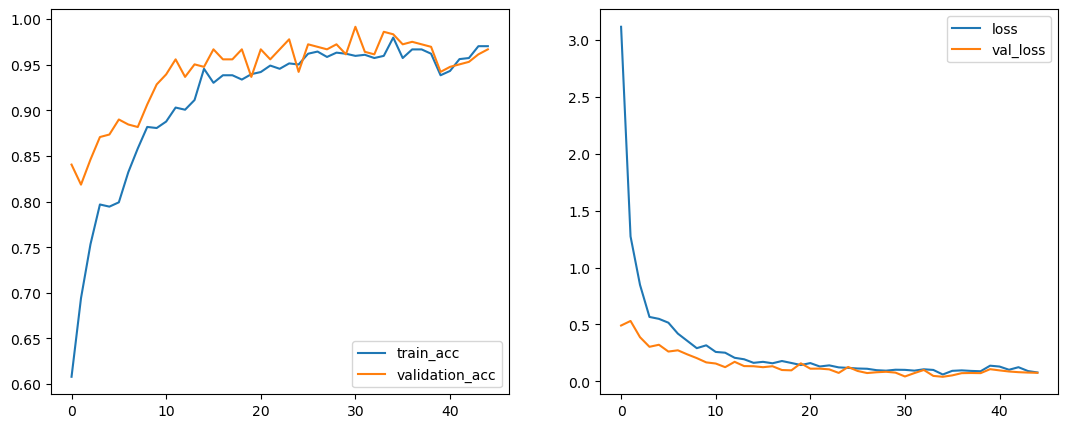

In [27]:
import matplotlib.pyplot as plt

predicted_data = pd.read_csv("./model/self-build history.csv")

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(predicted_data["epoch"], predicted_data["acc"], label = "train_acc")
plt.plot(predicted_data["epoch"], predicted_data["val_acc"], label = "validation_acc")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(predicted_data["epoch"], predicted_data["loss"], label = "loss")
plt.plot(predicted_data["epoch"], predicted_data["val_loss"], label = "val_loss")
plt.legend()

### 학습에 사용하지 않은 데이터에 대한 예측

In [29]:
val_data1.shape

model.predict(val_data1)

16/16 [==============================] - 0s 2ms/step


array([[3.63943249e-01],
       [1.91515803e-01],
       [1.27409771e-01],
       [8.08605850e-02],
       [5.55036627e-02],
       [3.44532393e-02],
       [5.64018190e-02],
       [7.41986558e-02],
       [7.53665641e-02],
       [1.20720640e-01],
       [2.04915300e-01],
       [3.87601197e-01],
       [3.06190073e-01],
       [3.25052559e-01],
       [2.63226926e-01],
       [2.71821231e-01],
       [2.69568890e-01],
       [2.84850121e-01],
       [2.49514684e-01],
       [1.78707406e-01],
       [1.98724821e-01],
       [2.71532267e-01],
       [2.48213395e-01],
       [2.78735518e-01],
       [2.23510563e-01],
       [2.35689610e-01],
       [2.05464467e-01],
       [2.11203679e-01],
       [2.65729129e-01],
       [3.09803098e-01],
       [4.03574035e-02],
       [9.34549645e-02],
       [2.01161876e-01],
       [1.78282782e-02],
       [1.81039460e-02],
       [2.26769194e-01],
       [7.47931719e-01],
       [5.78261852e-01],
       [8.16399634e-01],
       [8.14188600e-01],


### 의문점
1. 데이터의 경우 시간이 경과함에 따라 관절각도도 달라지기 마련인데 이런식의 예측이 맞는가..? 정확도는 왜 잘나오는거며..
2. 얼굴을 제외한 모든 관절들에 대한 각도를 구하는게 맞는가..?

### 개선사항
각도계산 이후 하나의 DataFrame으로 합칠 때 첫 번째 컬럼 이름 이상하게 나오는 현상 해결해야 함